In [91]:
# Libraries for Exploratory Data Analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df = pd.read_csv(r"C:\Users\shara\Downloads\heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
df.shape

(303, 14)

In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
#to find our=t the unique values form each column
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [50]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [53]:
# change the categorical type to categorical variables
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [57]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=object)

In [60]:
# to count the number in of each category decending order
df.ca.value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [63]:
# to check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [72]:
# change the labelling for better interpretation/ visualization understanding
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['slope'] = df.cp.replace({1: "upsloping", 
                          2: "flat", 
                          3:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [75]:
# to know the basic stats
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,4.000000


## EDA on Heart Disease Dataset

In [79]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

target
Disease       165
No_disease    138
Name: count, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

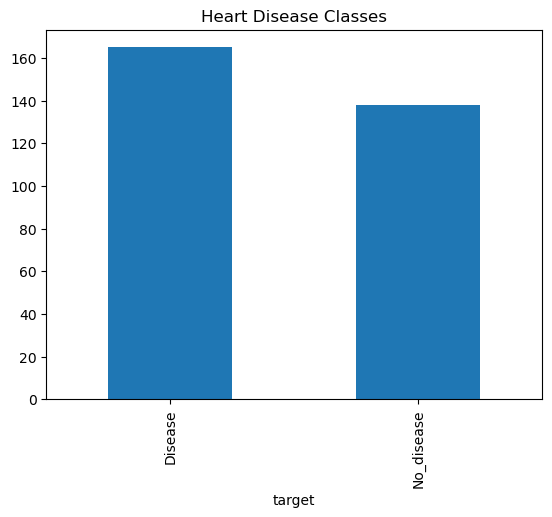

In [82]:
print(df.target.value_counts())
df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

Text(0.5, 1.0, 'Age Distribution')

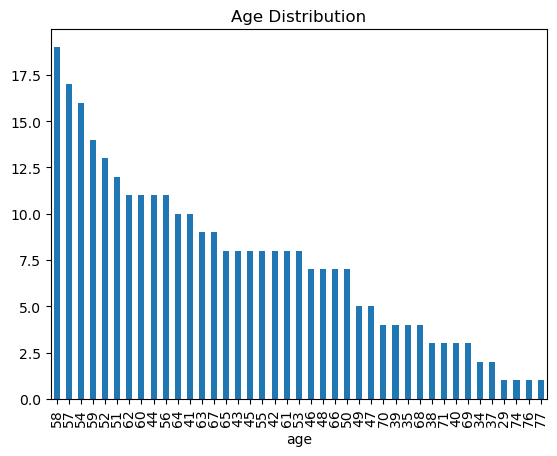

In [85]:
# print(df.age.value_counts())
df['age'].value_counts().plot(kind='bar').set_title('Age Distribution')

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: count, dtype: int64


Text(0, 0.5, 'Age distribution')

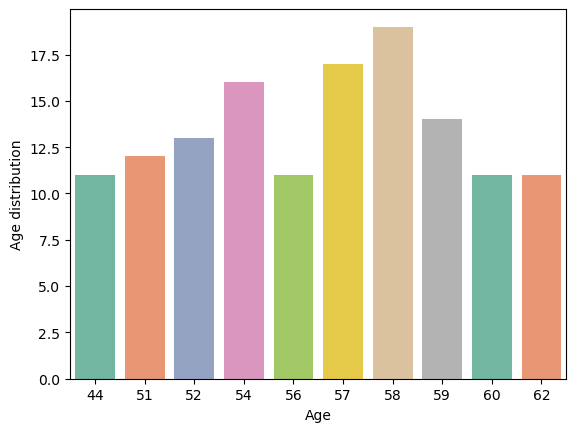

In [93]:
# Analyze distribution in age in range 10
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
            y=df.age.value_counts()[:10].values,
            palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

In [96]:
# to know the youngest or oldest in age
print(min(df.age))
print(max(df.age))
print(df.age.mean())

29
77
54.366336633663366


sex
Male      207
Female     96
Name: count, dtype: int64


Text(0.5, 1.0, 'sex Distribution')

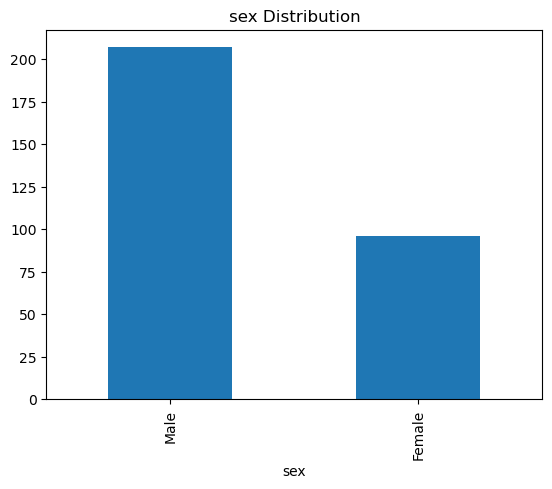

In [99]:
print(df.sex.value_counts())
df['sex'].value_counts().plot(kind='bar').set_title('sex Distribution')

cp
0                   143
atypical_angina      87
typical_angina       50
non-anginal pain     23
Name: count, dtype: int64


Text(0.5, 1.0, 'Chest Pain Distribution')

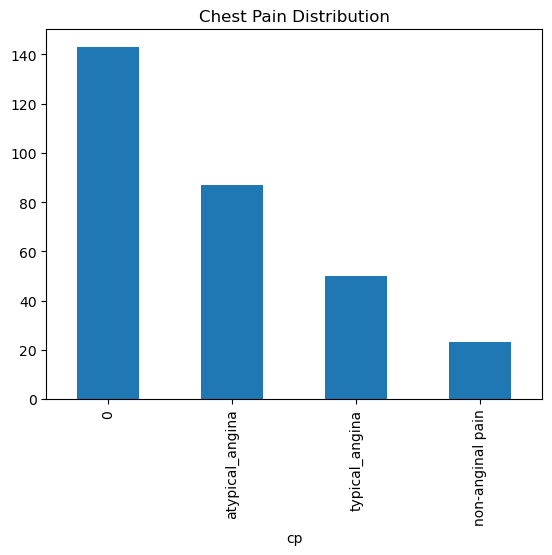

In [102]:
print(df.cp.value_counts())
df['cp'].value_counts().plot(kind='bar').set_title('Chest Pain Distribution')

restecg
1    152
0    147
2      4
Name: count, dtype: int64


Text(0.5, 1.0, 'Resting ECG Distribution')

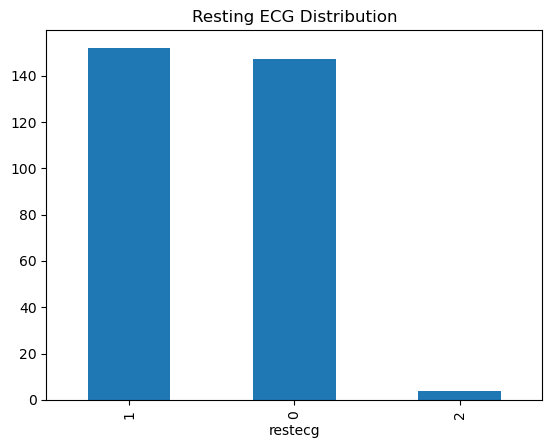

In [105]:
print(df.restecg.value_counts())
df['restecg'].value_counts().plot(kind='bar').set_title('Resting ECG Distribution')

exang
No     204
Yes     99
Name: count, dtype: int64


Text(0.5, 1.0, 'Exercise Induced Angina Distribution')

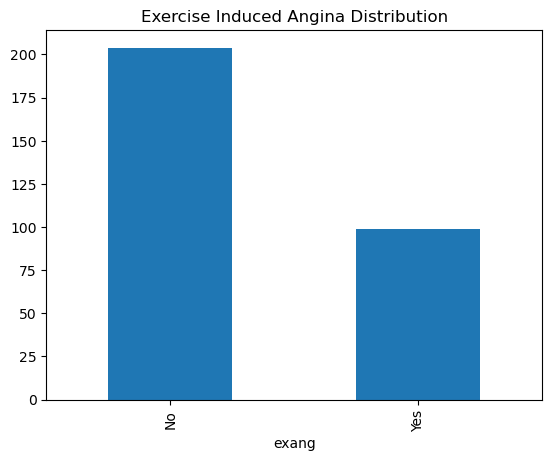

In [108]:
print(df.exang.value_counts())
df['exang'].value_counts().plot(kind='bar').set_title('Exercise Induced Angina Distribution')

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


Text(0.5, 1.0, 'NUmber of Major Vessel Distribution')

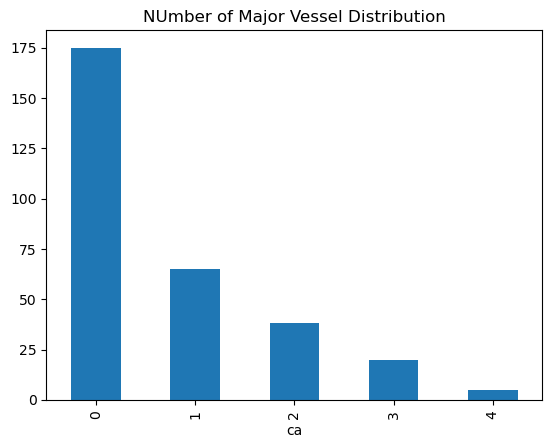

In [111]:
print(df.ca.value_counts())
df['ca'].value_counts().plot(kind='bar').set_title('NUmber of Major Vessel Distribution')

thal
reversable_defect    166
normal               117
fixed_defect          18
0                      2
Name: count, dtype: int64


Text(0.5, 1.0, 'thal Distribution')

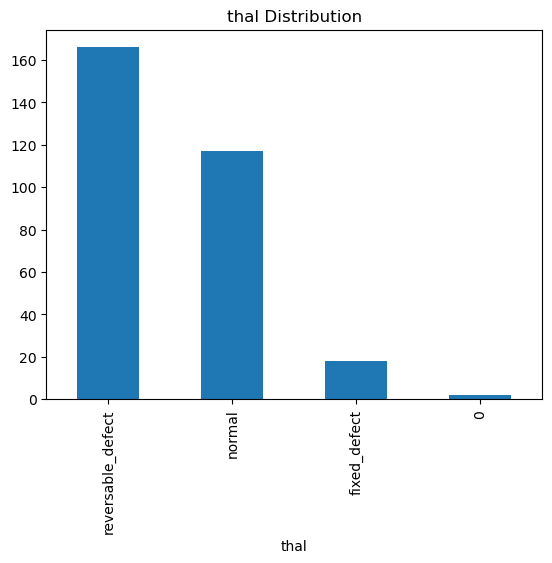

In [114]:
print(df.thal.value_counts())
df['thal'].value_counts().plot(kind='bar').set_title('thal Distribution')

# Visualize categorical data distribution

Text(0.5, 1.0, 'Disease classes according to Sex')

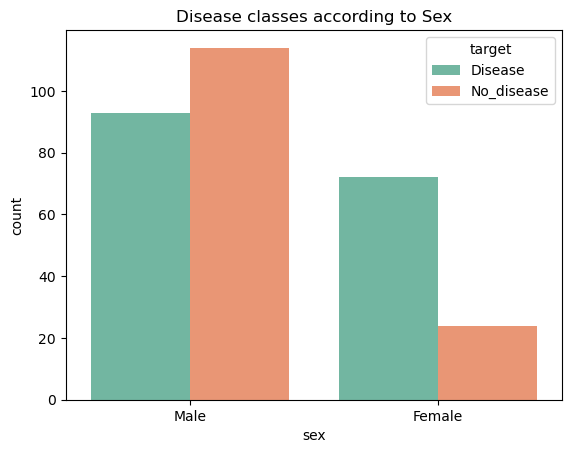

In [118]:
sns.countplot(x='sex', hue='target', data=df, palette='Set2').set_title('Disease classes according to Sex')

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

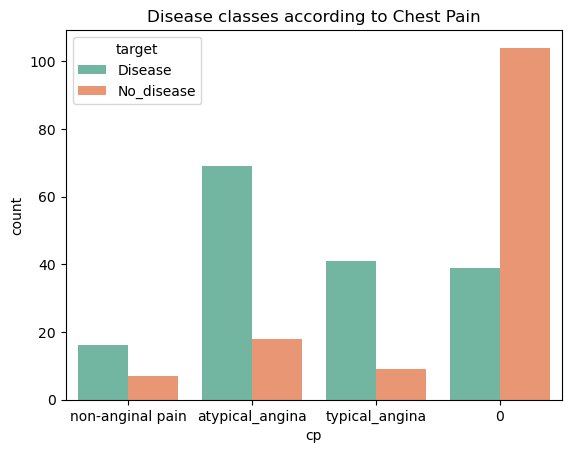

In [121]:
sns.countplot(x='cp', hue='target', data=df, palette='Set2').set_title('Disease classes according to Chest Pain')

Text(0.5, 1.0, 'Disease classes according to thal')

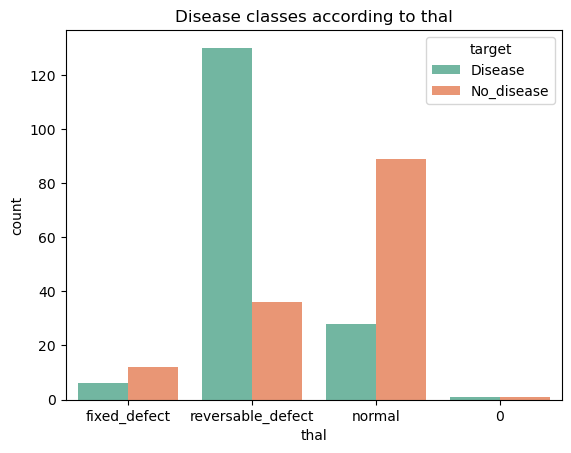

In [124]:
sns.countplot(x='thal', hue='target', data=df, palette='Set2').set_title('Disease classes according to thal')

Text(0.5, 1.0, 'Disease classes according to Exercise Induced Angina')

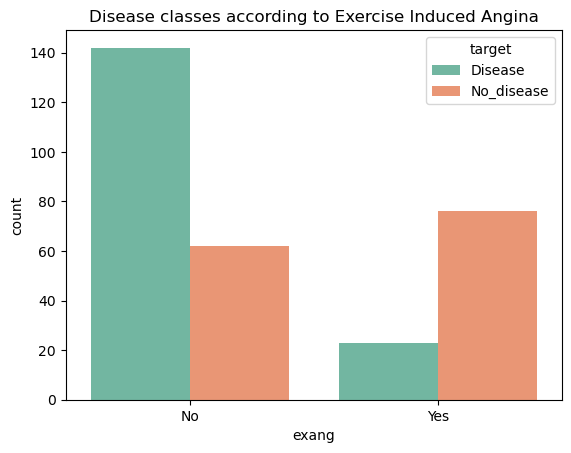

In [127]:
sns.countplot(x='exang', hue='target', data=df, palette='Set2').set_title('Disease classes according to Exercise Induced Angina')

Text(0.5, 1.0, 'Disease classes according to fbs')

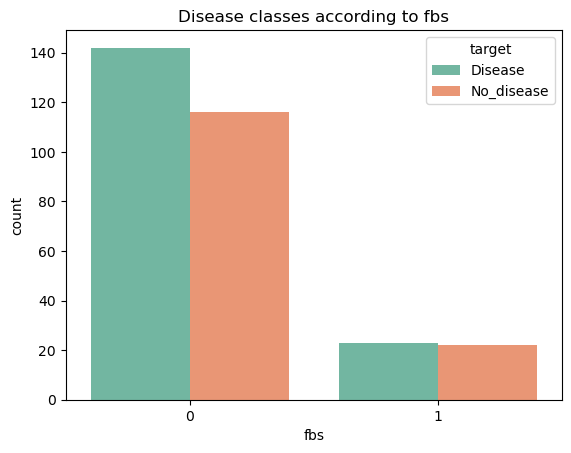

In [131]:
sns.countplot(x='fbs', hue='target', data=df, palette='Set2').set_title('Disease classes according to fbs')

Text(0.5, 1.0, 'Disease classes according to Num Major Vessel')

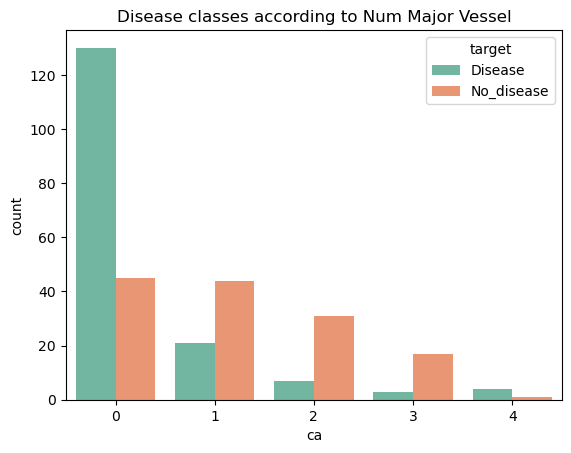

In [134]:
sns.countplot(x='ca', hue='target', data=df, palette='Set2').set_title('Disease classes according to Num Major Vessel')

# Visualize all together

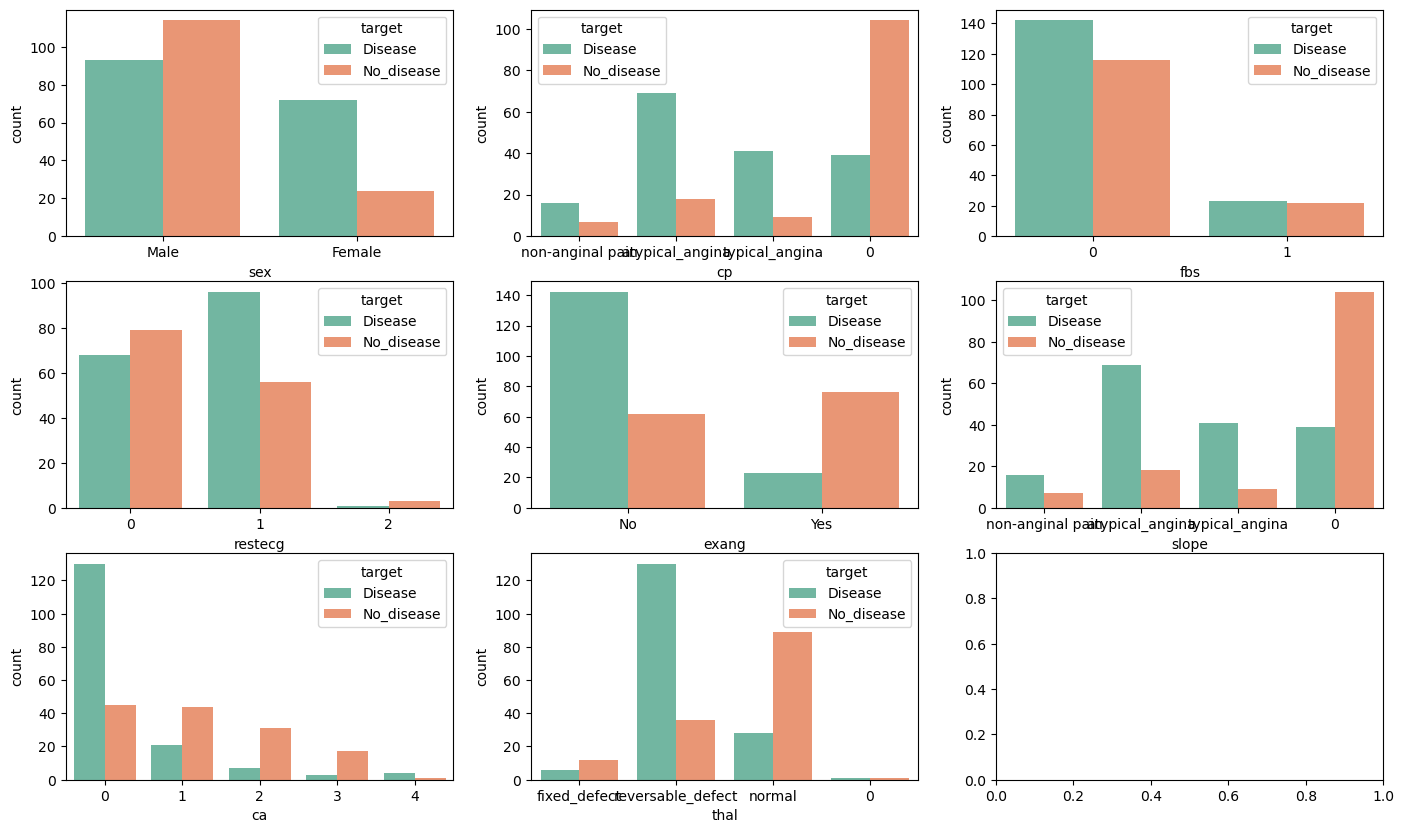

In [139]:
# for plotting, group categorical features in cat_feat
# to create dist in 8 feature, 9th is the target, 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'target':
        sns.countplot(x=feature, hue='target', data=df, ax=ax, palette='Set2')

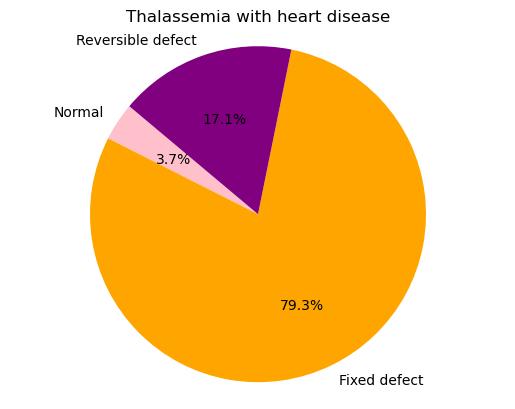

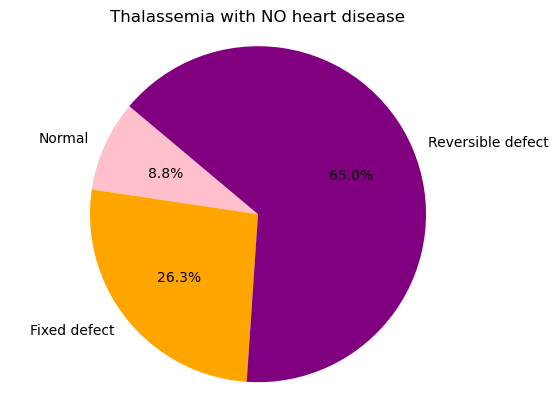

In [142]:
# Another way of visualizing: Pie charts for thalassemia Having heart disease

labels= 'Normal', 'Fixed defect', 'Reversible defect'
sizes=[6, 130, 28]
colors=['pink', 'orange', 'purple']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('Thalassemia with heart disease')
plt.show()

# Not having heart disease
labels= 'Normal', 'Fixed defect', 'Reversible defect'
sizes=[12, 36, 89]
colors=['pink', 'orange', 'purple']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('Thalassemia with NO heart disease')
plt.show()

## Visualize the distribution of continuous variable across target variable

C:\Users\shara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


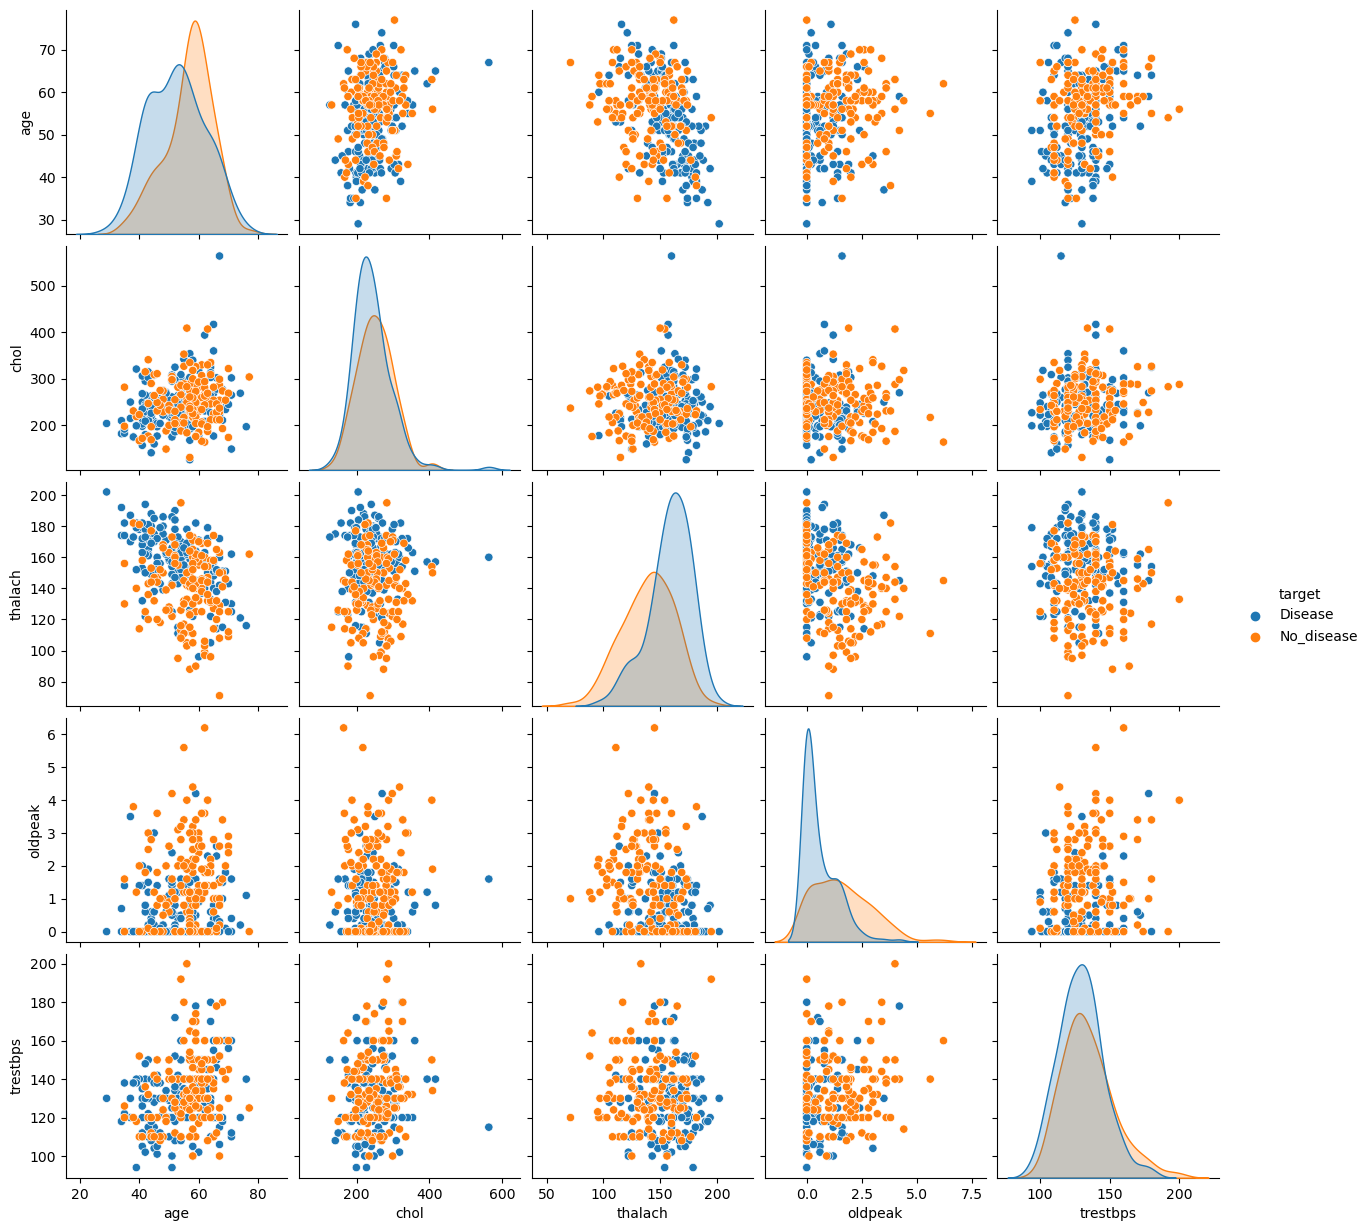

In [147]:
# define continuous variable & plot
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']  
sns.pairplot(df[continous_features + ['target']], hue='target')

C:\Users\shara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


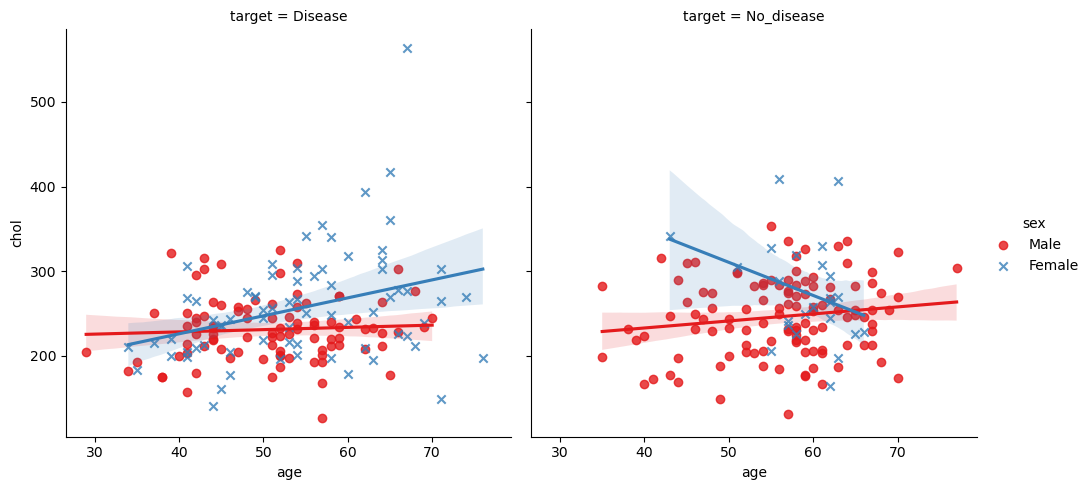

In [151]:
# to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           markers=["o", "x"],
           palette="Set1",
           data=df)
plt.show()

C:\Users\shara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


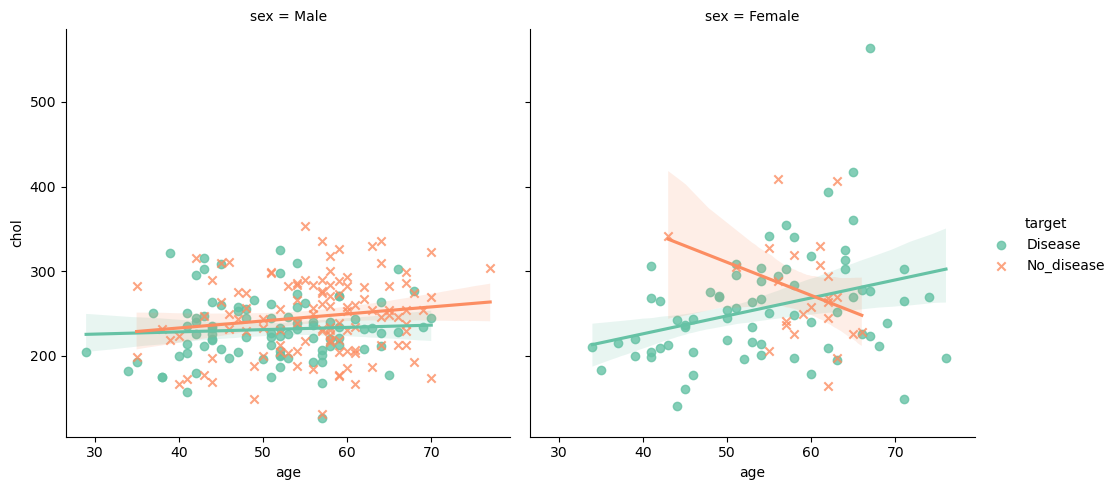

In [154]:
# to understand the relationship between age and chol in each of the sex, based on target.
sns.lmplot(x="age", 
           y="chol", 
           hue="target", 
           col="sex",
          #  row="target",
          #  order=2, 
           markers=["o", "x"],
           palette="Set2",
           data=df)
plt.show()

C:\Users\shara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


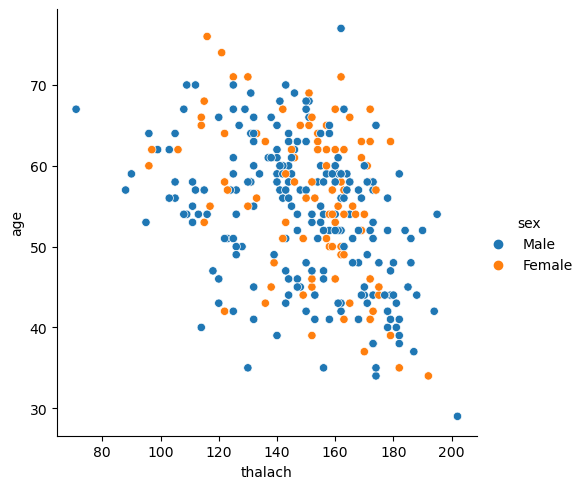

In [157]:
# relation plot relplot
sns.relplot(x='thalach', y = 'age', hue='sex', data=df )

In [167]:
df_numeric = df.select_dtypes(include=[np.number])

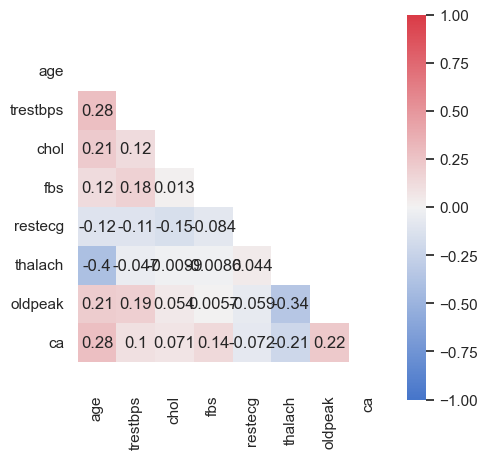

In [173]:
 # Correlation with Heatmap Visualization 
sns.set(style="white") 
mask = np.zeros_like(df_numeric.corr(), dtype=bool)  # Correct dtype
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(255, 10, as_cmap=True)
sns.heatmap(df_numeric.corr(), mask=mask, annot=True, square=True, cmap=cmap, vmin=-1, vmax=1, ax=ax)  

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

# Check for outliers

C:\Users\shara\AppData\Local\Temp\ipykernel_7304\933286221.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\shara\AppData\Local\Temp\ipykernel_7304\933286221.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\shara\AppData\Local\Temp\ipykernel_7304\933286221.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\shara\AppData\Local\Temp\ipykernel_7304\933286221.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\shara\AppData\Local\Temp\ipykernel_7304\933286221.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\shara\AppData\Local\Temp\ipykernel_7304\933286221.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\shara\AppData\Local\Temp\ipykernel_7304\933286221.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


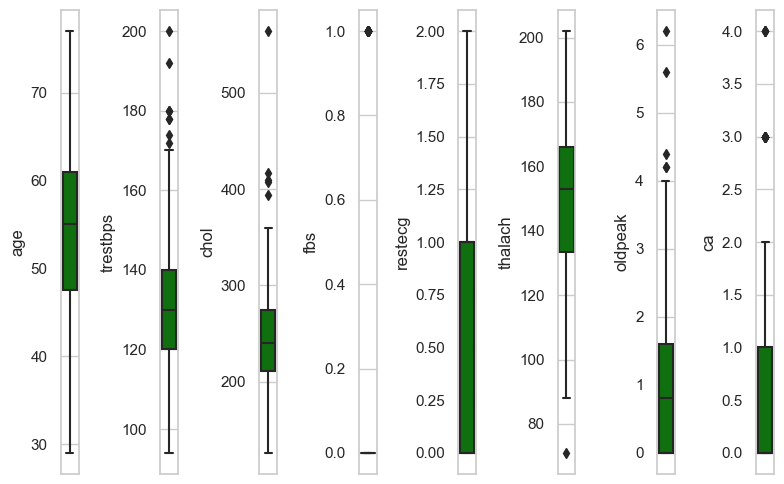

In [201]:
# to check outliers
#https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
import math
l = df_numeric.columns.values
number_of_columns=8
number_of_rows = math.ceil(len(l) / number_of_columns)
plt.figure(figsize=(number_of_columns,5*number_of_rows))
# Loop through all numeric columns and create boxplots
for i in range(0, len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(data=df_numeric, y=l[i], color='green', orient='v')
    plt.tight_layout()

plt.show()

age            Axes(0.125,0.653529;0.133621x0.226471)
trestbps    Axes(0.285345,0.653529;0.133621x0.226471)
chol         Axes(0.44569,0.653529;0.133621x0.226471)
fbs         Axes(0.606034,0.653529;0.133621x0.226471)
restecg     Axes(0.766379,0.653529;0.133621x0.226471)
thalach        Axes(0.125,0.381765;0.133621x0.226471)
oldpeak     Axes(0.285345,0.381765;0.133621x0.226471)
ca           Axes(0.44569,0.381765;0.133621x0.226471)
dtype: object

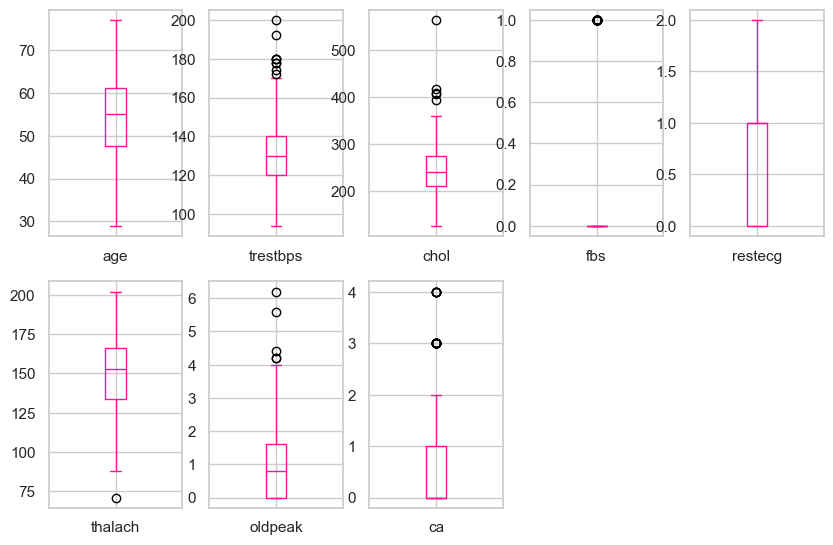

In [204]:
df_numeric.plot(kind='box', subplots=True, layout=(3,5),sharex=False,sharey=False, figsize=(10, 10), 
         color='deeppink')